In [1]:
import os,sys
%matplotlib inline
import matplotlib.pylab as plt
import pickle
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
sys.path.append(os.path.expanduser("~/Projects/Github/PyComplexHeatmap/"))
import PyComplexHeatmap
from PyComplexHeatmap import *

## Load an example brain networks dataset from seaborn

In [2]:
import seaborn as sns

# Load the brain networks dataset, select subset, and collapse the multi-index
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns
                  .get_level_values("network")
                  .astype(int)
                  .isin(used_networks))
df = df.loc[:, used_columns]

df.columns = df.columns.map("-".join)

# Compute a correlation matrix and convert to long-form
corr_mat = df.corr().stack().reset_index(name="correlation")
corr_mat['Level']=corr_mat.correlation.apply(lambda x:'High' if x>=0.7 else 'Middle' if x >= 0.3 else 'Low')
data=corr_mat.pivot(index='level_0',columns='level_1',values='correlation')

In [3]:
data.head()

level_1,1-1-lh,1-1-rh,12-1-lh,12-1-rh,12-2-lh,12-2-rh,12-3-lh,13-1-lh,13-1-rh,13-2-lh,...,7-2-lh,7-2-rh,7-3-lh,7-3-rh,8-1-lh,8-1-rh,8-2-lh,8-2-rh,8-3-lh,8-3-rh
level_0,,,,,,,,,,,,,,,,,,,,,
1-1-lh,1.000000,0.881516,-0.049793,0.026902,-0.144335,-0.141253,0.119250,-0.261589,-0.272701,-0.370021,...,-0.366065,-0.325680,-0.196770,-0.144566,-0.366818,-0.388756,-0.352529,-0.363982,-0.341524,-0.350452
1-1-rh,0.881516,1.000000,-0.112697,-0.036909,-0.144277,-0.189683,0.084633,-0.324230,-0.332886,-0.374322,...,-0.361036,-0.274151,-0.142392,-0.070452,-0.358625,-0.402173,-0.302286,-0.339989,-0.315931,-0.343379
12-1-lh,-0.049793,-0.112697,1.000000,0.343464,0.470239,0.100802,0.438449,0.339667,0.089811,0.272394,...,-0.036493,-0.171179,-0.043298,-0.158039,0.005598,-0.060007,0.079078,-0.040060,0.027878,-0.075781
12-1-rh,0.026902,-0.036909,0.343464,1.000000,0.130549,0.278569,0.127621,-0.014404,0.051249,-0.090130,...,-0.170053,-0.124278,-0.112148,-0.063705,-0.172007,-0.040629,-0.079687,0.024864,-0.092263,-0.068858
12-2-lh,-0.144335,-0.144277,0.470239,0.130549,1.000000,0.521377,0.506652,0.320966,0.141884,0.608392,...,-0.075986,-0.095015,0.012966,-0.082816,0.023340,0.058718,0.034181,0.033355,-0.022982,0.025638


In [4]:
corr_mat.Level.value_counts().index.tolist()

['Low', 'Middle', 'High']

In [5]:
corr_mat.head()

,level_0,level_1,correlation,Level
0,1-1-lh,1-1-lh,1.000000,High
1,1-1-lh,1-1-rh,0.881516,High
2,1-1-lh,5-1-lh,0.431619,Middle
3,1-1-lh,5-1-rh,0.418708,Middle
4,1-1-lh,6-1-lh,-0.084634,Low


# Dot Heatmap

## Plot traditional heatmap using square marker `marker='s'`

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Plotting legends..


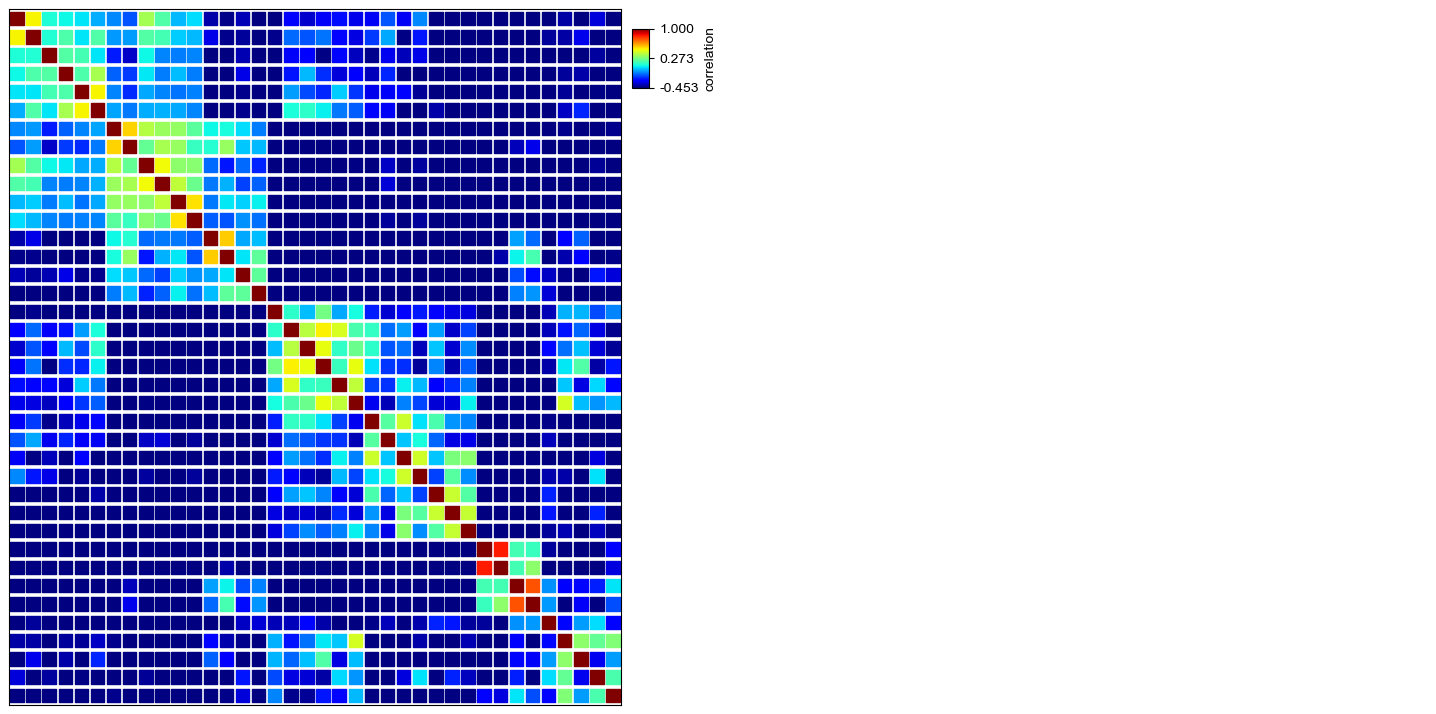

In [6]:
plt.figure(figsize=(8,8))
cm = DotClustermapPlotter(data=corr_mat,x='level_0',y='level_1',value='correlation',
              c='correlation',cmap='jet',vmax=1,vmin=0,s=0.7,marker='s',spines=True,alpha=0.7)
cm.ax_heatmap.grid(which='minor',color='white',linestyle='--',alpha=0.6,linewidth=1)
plt.show()

## Simple dot heatmap using fixed dot size
In default, using circle marker: `marker='o'`

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Plotting legends..


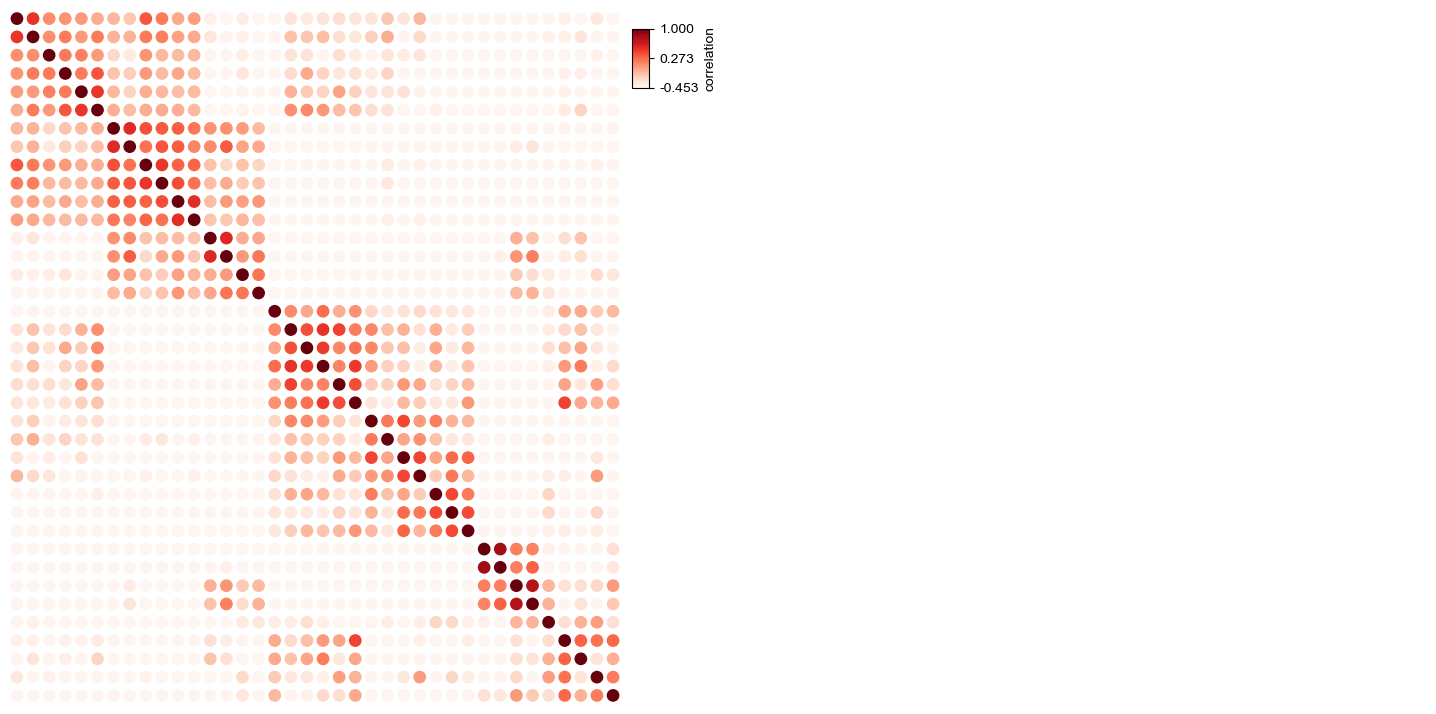

In [7]:
plt.figure(figsize=(8,8))
cm = DotClustermapPlotter(corr_mat,x='level_0',y='level_1',value='correlation',
              c='correlation',cmap='Reds',vmax=1,vmin=0,s=0.5)
plt.show()

## Changing the size of point
In default, we determined the size of the points based on the `value` col if parameter `s` was not given

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Plotting legends..


/Users/wding/anaconda3/lib/python3.10/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


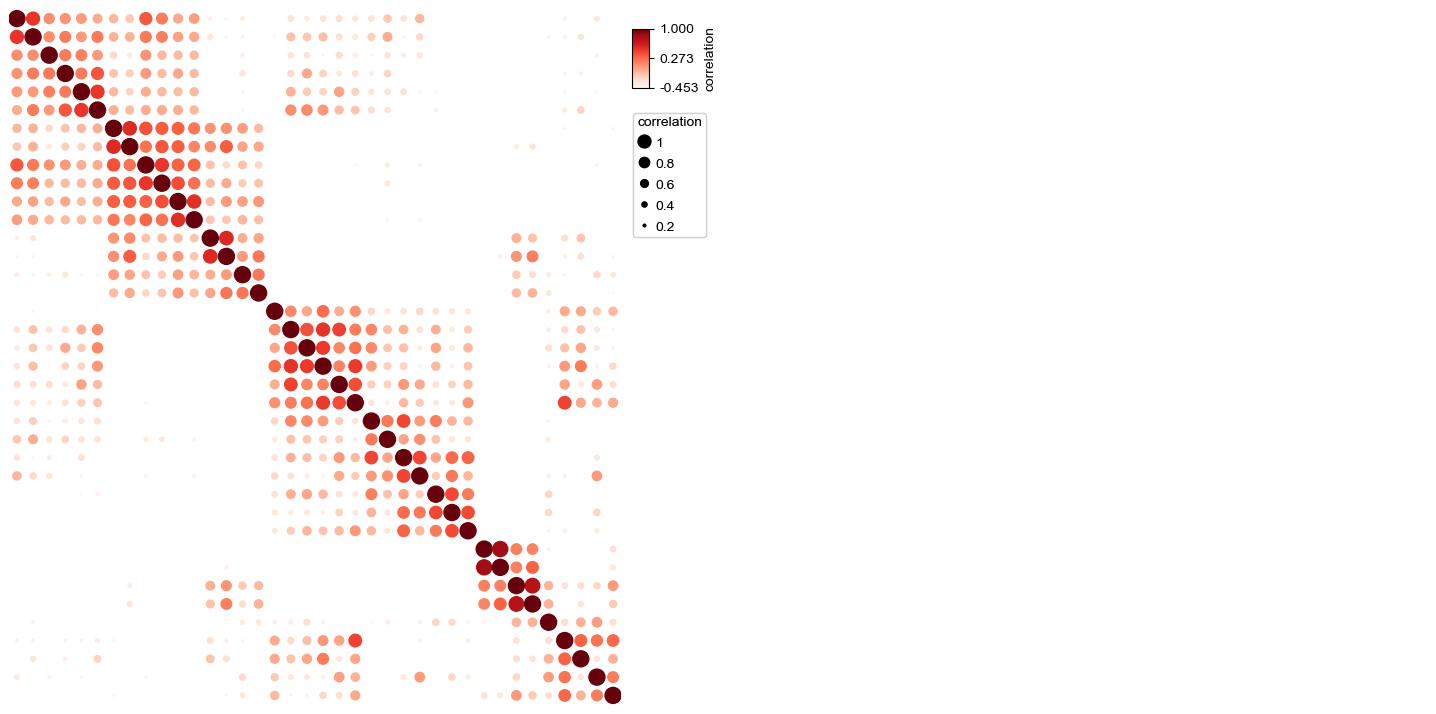

In [8]:
plt.figure(figsize=(8,8))
cm = DotClustermapPlotter(corr_mat,x='level_0',y='level_1',value='correlation',
              c='correlation',s='correlation',cmap='Reds',vmax=1,vmin=0)
cm.ax_heatmap.grid(which='minor',color='gray',linestyle='--',alpha=0.4)
plt.show()

## Add parameter `hue` and use different `colors` for different groups

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Plotting legends..


/Users/wding/anaconda3/lib/python3.10/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/wding/Projects/Github/PyComplexHeatmap/PyComplexHeatmap/dotHeatmap.py:158: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(x=df1.X.values, y=df1.Y.values, s=df1.S * ratio,
/Users/wding/anaconda3/lib/python3.10/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


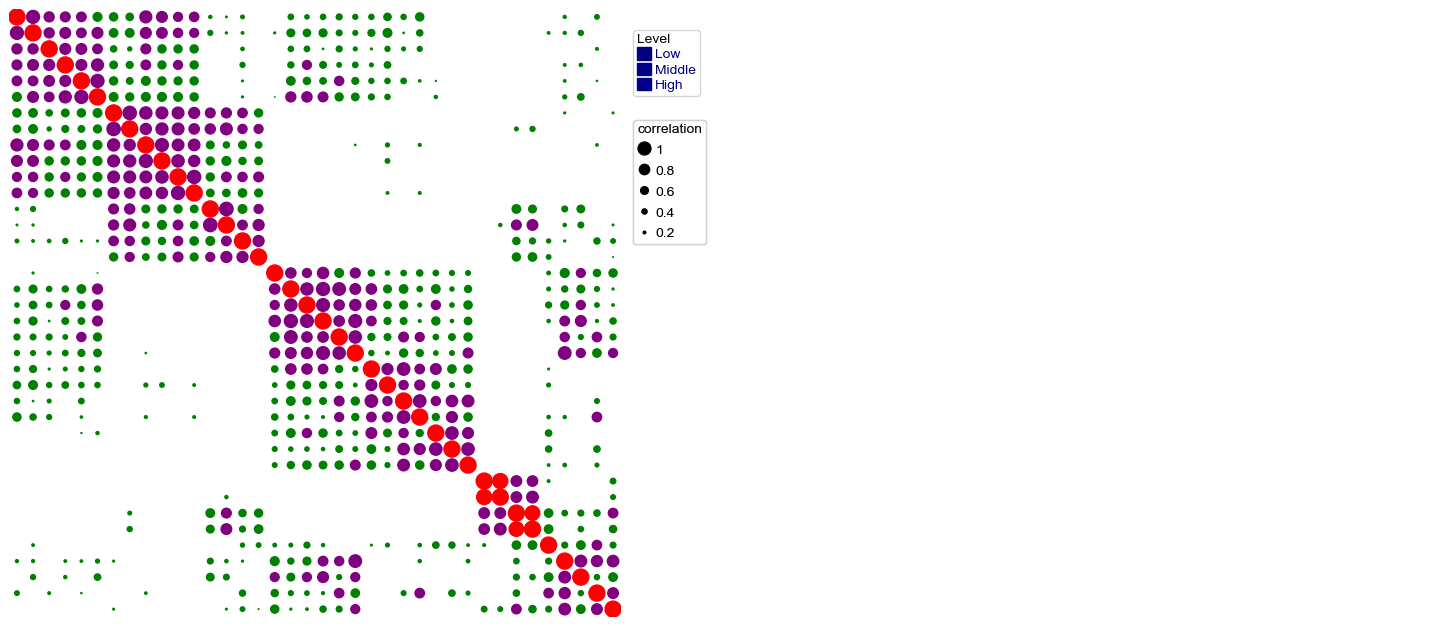

In [9]:
plt.figure(figsize=(8,8))
cm = DotClustermapPlotter(corr_mat,x='level_0',y='level_1',value='correlation',hue='Level',
              colors={'High':'red','Middle':'purple','Low':'green'},s='correlation',vmax=1,vmin=0)
plt.show()

## Add parameter `hue` and use different `cmap` and `marker` for different groups

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..


/Users/wding/anaconda3/lib/python3.10/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Plotting legends..


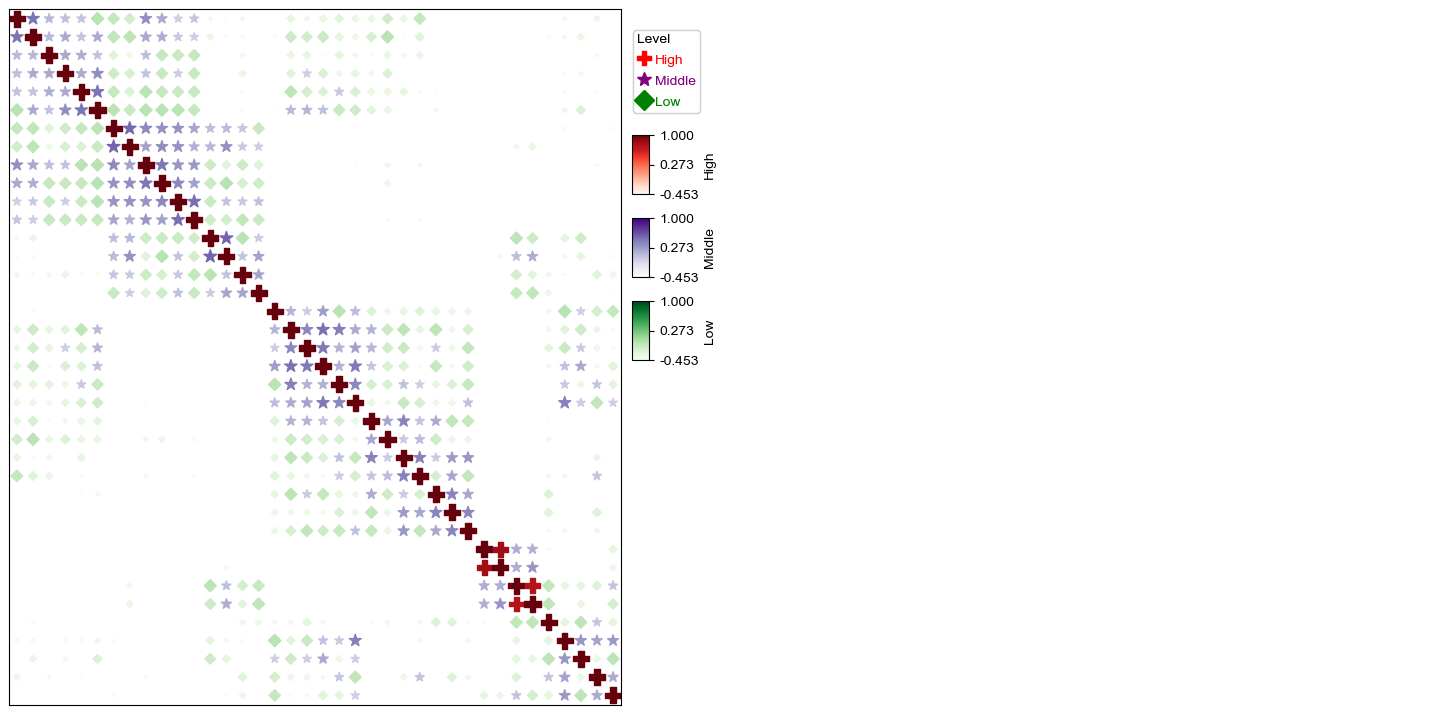

In [10]:
plt.figure(figsize=(8,8))
cm = DotClustermapPlotter(corr_mat,x='level_0',y='level_1',value='correlation',hue='Level',
              cmap={'High':'Reds','Middle':'Purples','Low':'Greens'},
              colors={'High':'red','Middle':'purple','Low':'green'},
              marker={'High':'P','Middle':'*','Low':'D'},spines=True,
              vmax=1,vmin=0,alpha=0.9)
plt.show()

# Dot Clustermap

## Plot clustermap using seaborn brain networks dataset

In [11]:
corr_mat.head()

,level_0,level_1,correlation,Level
0,1-1-lh,1-1-lh,1.000000,High
1,1-1-lh,1-1-rh,0.881516,High
2,1-1-lh,5-1-lh,0.431619,Middle
3,1-1-lh,5-1-rh,0.418708,Middle
4,1-1-lh,6-1-lh,-0.084634,Low


In [12]:
df_row=corr_mat['level_0'].drop_duplicates().to_frame()
df_row['RowGroup']=df_row.level_0.apply(lambda x:x.split('-')[0])
df_row.set_index('level_0',inplace=True)

df_col=corr_mat['level_1'].drop_duplicates().to_frame()
df_col['ColGroup']=df_col.level_1.apply(lambda x:x.split('-')[0])
df_col.set_index('level_1',inplace=True)

print(df_row.head())
print(df_col.head())

        RowGroup
level_0         
1-1-lh         1
1-1-rh         1
5-1-lh         5
5-1-rh         5
6-1-lh         6
        ColGroup
level_1         
1-1-lh         1
1-1-rh         1
5-1-lh         5
5-1-rh         5
6-1-lh         6


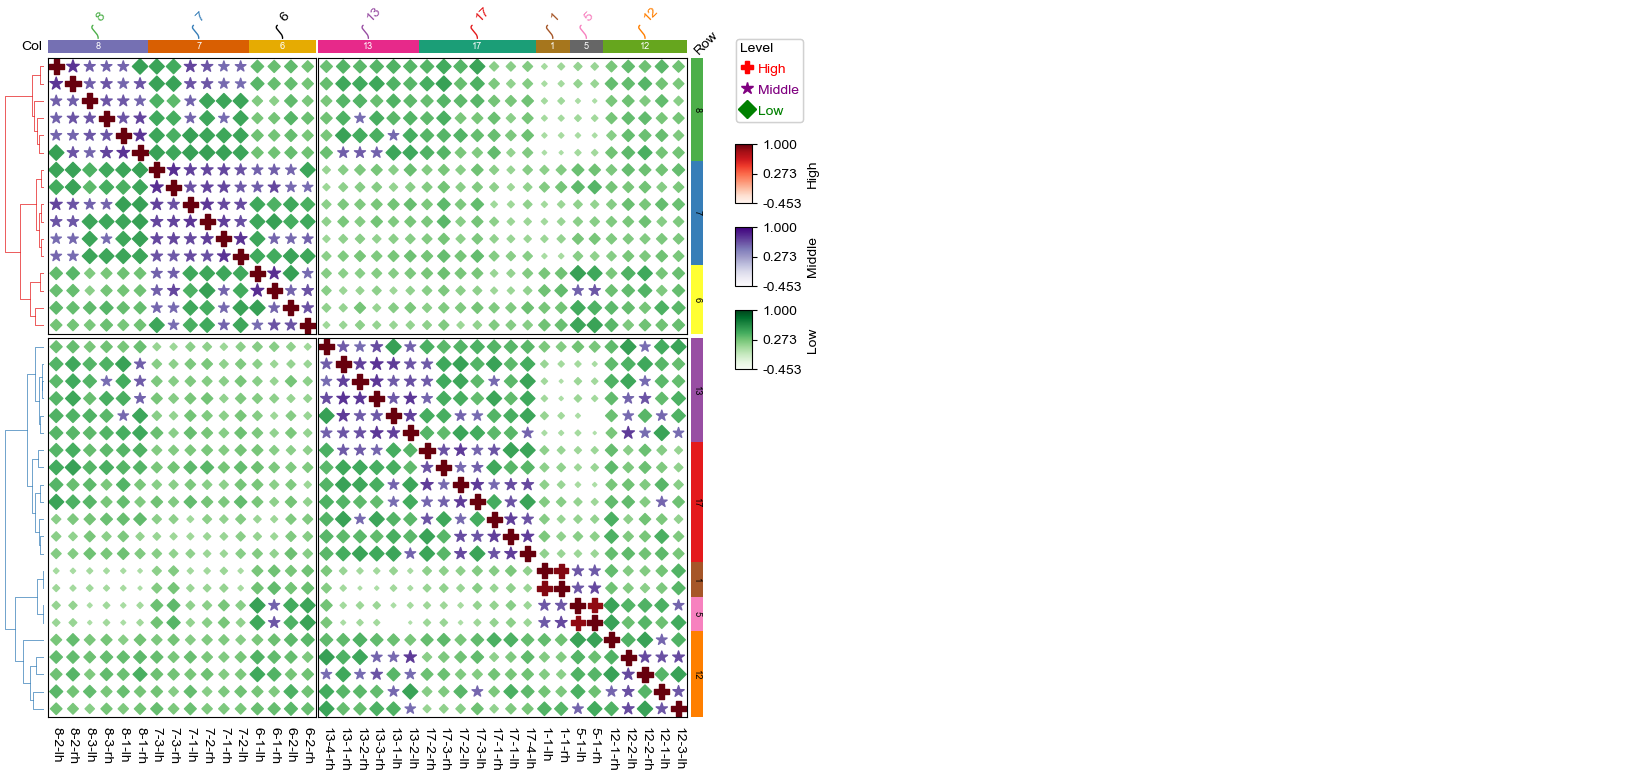

In [13]:
row_ha = HeatmapAnnotation(Row=anno_simple(df_row.RowGroup,cmap='Set1',
                                           add_text=True,text_kws={'color':'black','rotation':-90},
                                          legend=False),
                           axis=0,verbose=0,label_kws={'rotation':45,'horizontalalignment':'left'})

col_ha = HeatmapAnnotation(label=anno_label(df_col.ColGroup, merge=True,rotation=45),
                           Col=anno_simple(df_col.ColGroup,cmap='Dark2',legend=False,add_text=True),
                           verbose=0,label_side='left',label_kws={'horizontalalignment':'right'})

plt.figure(figsize=(9, 8))
cm = DotClustermapPlotter(data=corr_mat, x='level_0',y='level_1',value='correlation',
                          hue='Level', cmap={'High':'Reds','Middle':'Purples','Low':'Greens'},
                          colors={'High':'red','Middle':'purple','Low':'green'},
                          marker={'High':'P','Middle':'*','Low':'D'},
                          top_annotation=col_ha,right_annotation=row_ha,
                          col_split=2,row_split=2, col_split_gap=0.5,row_split_gap=1,
                          show_rownames=True,show_colnames=True,row_dendrogram=True,
                          tree_kws={'row_cmap': 'Set1'},verbose=0,legend_gap=7,spines=True,)
plt.show()

## Visualize up to five dimension data using DotClustermapPlotter
Plot enrichment analysis result using example dataset with samples annotations

In [14]:
data=pd.read_csv("../data/kycg_result.txt",sep='\t')
data=data.loc[data.Category.isin(['rmsk1','ChromHMM','EnsRegBuild'])]
data.SampleID.replace({'Clark2018_Argelaguet2019':'Dataset1','Luo2022':'Dataset2'},inplace=True)
max_p=np.nanmax(data['-log10(Pval)'].values)
data['-log10(Pval)'].fillna(max_p,inplace=True)
data['ID']=data.SampleID + '-' + data.CpGType
vc=data.groupby('Term').SampleID.apply(lambda x:x.nunique())

data=data.loc[data.Term.isin(vc[vc>=2].index.tolist())]
# p_max=data['-log10(Pval)'].max()
# p_min=data['-log10(Pval)'].min()
# data['-log10(Pval)']=data['-log10(Pval)'].apply(lambda x:(x-p_min)/(p_max-p_min))
df_col=data.ID.drop_duplicates().to_frame()
df_col['Dataset']=df_col.ID.apply(lambda x:x.split('-')[0])
df_col['Correlation']=df_col.ID.apply(lambda x:x.split('-')[1])
df_col.set_index('ID',inplace=True)
df_row=data.loc[:,['Term','Category']].drop_duplicates()
df_row.set_index('Term',inplace=True)

In [15]:
data.head()

,Term,odds_ratio,Category,SampleID,CpGType,pvalue,EnrichType,-log10(Pval),ID
49,Het,1.061,ChromHMM,Dataset1,Negative,2.020000e-07,Enrich,26.0,Dataset1-Negative
55,Tx,1.029,ChromHMM,Dataset1,Negative,4.580000e-07,Enrich,26.0,Dataset1-Negative
65,TssFlnk,1.056,ChromHMM,Dataset1,Negative,2.370000e-06,Enrich,26.0,Dataset1-Negative
112,TxWk,1.022,ChromHMM,Dataset1,Negative,8.660000e-05,Enrich,26.0,Dataset1-Negative
346,DNA?,1.350,rmsk1,Dataset1,Negative,2.760000e-02,Enrich,26.0,Dataset1-Negative


In [16]:
data['-log10(Pval)'].describe()

count    64.000000
mean     25.356918
std       3.632073
min       3.119186
25%      26.000000
50%      26.000000
75%      26.000000
max      26.000000
Name: -log10(Pval), dtype: float64

In [17]:
print(data.CpGType.unique())
print(data.EnrichType.unique())

['Negative' 'Positive']
['Enrich' 'Depletion']


In [18]:
df_col

,Dataset,Correlation
ID,,
Dataset1-Negative,Dataset1,Negative
Dataset1-Positive,Dataset1,Positive
Dataset2-Negative,Dataset2,Negative
Dataset2-Positive,Dataset2,Positive


In [19]:
df_row

,Category
Term,
Het,ChromHMM
Tx,ChromHMM
TssFlnk,ChromHMM
TxWk,ChromHMM
DNA?,rmsk1
srpRNA,rmsk1
DNA,rmsk1
Unknown,rmsk1
Satellite,rmsk1


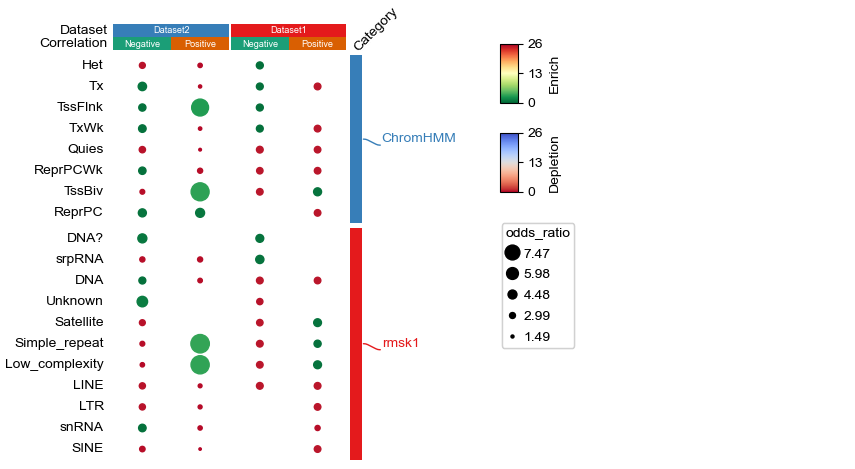

In [20]:
row_ha = HeatmapAnnotation(
                           Category=anno_simple(df_row.Category,cmap='Set1',
                                           add_text=False,legend=False),
                           label=anno_label(df_row.Category, merge=True,rotation=0),
                           axis=0,verbose=0,label_kws={'rotation':45,'horizontalalignment':'left'})

col_ha = HeatmapAnnotation(
                           Dataset=anno_simple(df_col.Dataset,cmap='Set1',legend=False,add_text=True),
                           Correlation=anno_simple(df_col.Correlation,cmap='Dark2',legend=False,add_text=True),
                           verbose=0,label_side='left',label_kws={'horizontalalignment':'right'})

plt.figure(figsize=(3.5, 5))
cm = DotClustermapPlotter(data=data, x='ID',y='Term',value='-log10(Pval)',c='-log10(Pval)',s='odds_ratio',
                          hue='EnrichType', row_cluster=False,col_cluster=False,
                          cmap={'Enrich':'RdYlGn_r','Depletion':'coolwarm_r'},
                          colors={'Enrich':'red','Depletion':'blue'},
                          #marker={'Enrich':'^','Depletion':'v'},
                          top_annotation=col_ha,right_annotation=row_ha,
                          col_split=df_col.Dataset,row_split=df_row.Category, col_split_gap=0.5,row_split_gap=1,
                          show_rownames=True,show_colnames=False,row_dendrogram=False,
                          verbose=0,legend_gap=7,alpha=0.8)
plt.savefig("dotHeatmap1.pdf",bbox_inches='tight')
plt.show()

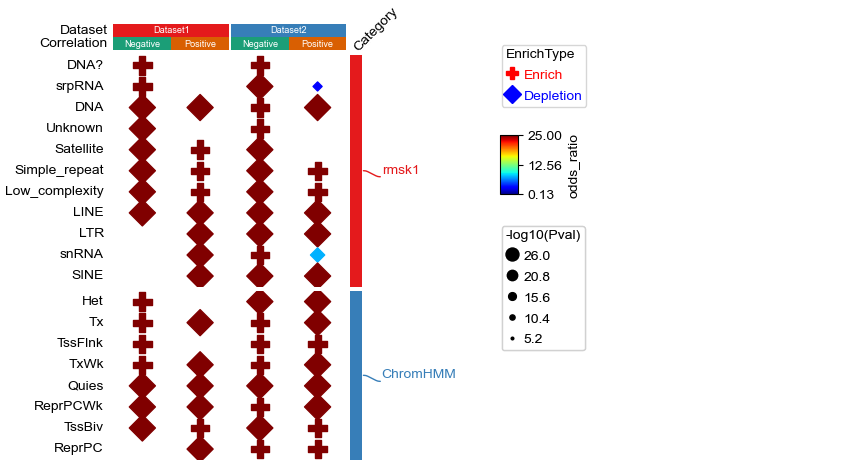

In [21]:
plt.figure(figsize=(3.5, 5))
cm = DotClustermapPlotter(data=data, x='ID',y='Term',value='odds_ratio',c='-log10(Pval)',s='-log10(Pval)',
                          hue='EnrichType', row_cluster=False,cmap='jet',
                          colors={'Enrich':'red','Depletion':'blue'},
                          marker={'Enrich':'P','Depletion':'D'},value_na=25,c_na=25,
                          top_annotation=col_ha,right_annotation=row_ha,
                          col_split=df_col.Dataset,row_split=df_row.Category, col_split_gap=0.5,row_split_gap=1,
                          show_rownames=True,verbose=0,legend_gap=7,alpha=0.7)
# plt.savefig(os.path.expanduser("~/Gallery/20230227_kycg.pdf"),bbox_inches='tight')
plt.show()

In [22]:
data['-log10(Pval)'].describe()

count    64.000000
mean     25.356918
std       3.632073
min       3.119186
25%      26.000000
50%      26.000000
75%      26.000000
max      26.000000
Name: -log10(Pval), dtype: float64

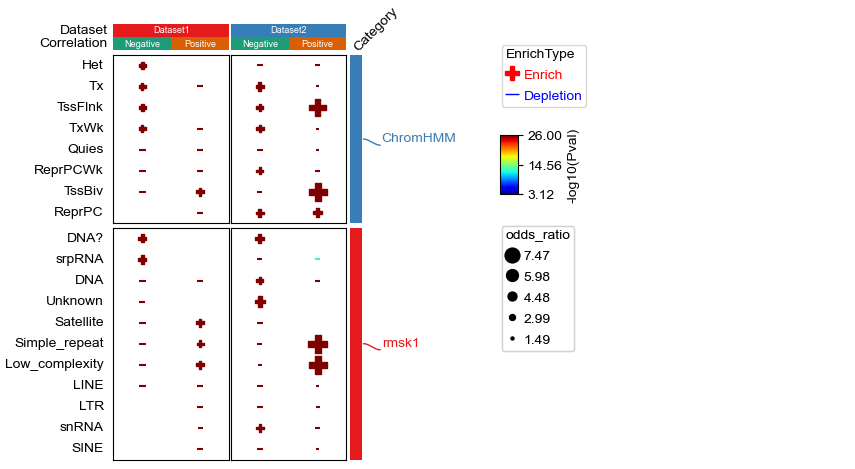

In [23]:
plt.figure(figsize=(3.5, 5))
cm = DotClustermapPlotter(data=data, x='ID',y='Term',value='-log10(Pval)',c='-log10(Pval)',s='odds_ratio',
                          hue='EnrichType', row_cluster=False,col_cluster=False,cmap='jet',
                          colors={'Enrich':'red','Depletion':'blue'},
                          marker={'Enrich':'P','Depletion':'_'},value_na=25,c_na=25,
                          top_annotation=col_ha,right_annotation=row_ha,
                          col_split=df_col.Dataset,row_split=df_row.Category, col_split_gap=0.5,row_split_gap=1,
                          show_rownames=True,verbose=0,legend_gap=7,spines=True,)
plt.show()